In [1]:
import os
# Get the current working directory
current_path = os.getcwd()
# Define the relative paths to your data and .venv folders
data_path = os.path.join(current_path, 'data')
venv_path = os.path.join(current_path, '.venv')

# Use the relative paths in your code
OPENSLIDE_PATH = os.path.join(venv_path, 'Lib', 'site-packages', 'openslide-win64-20230414', 'bin')

if hasattr(os, 'add_dll_directory'):
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide
from src import preprocessing as pp
from openslide import open_slide
import matplotlib.pyplot as plt
import numpy as np

In [2]:
slide_path = os.path.join(data_path, 'training', 'tumor', 'tumor_001.tif')
ann_path = os.path.join(data_path, 'training', 'lesion_annotations_training',
                         'tumor_001.xml')

In [3]:
slide = open_slide(slide_path)
f_mask = pp.foreground_background_segmentation(slide_path)

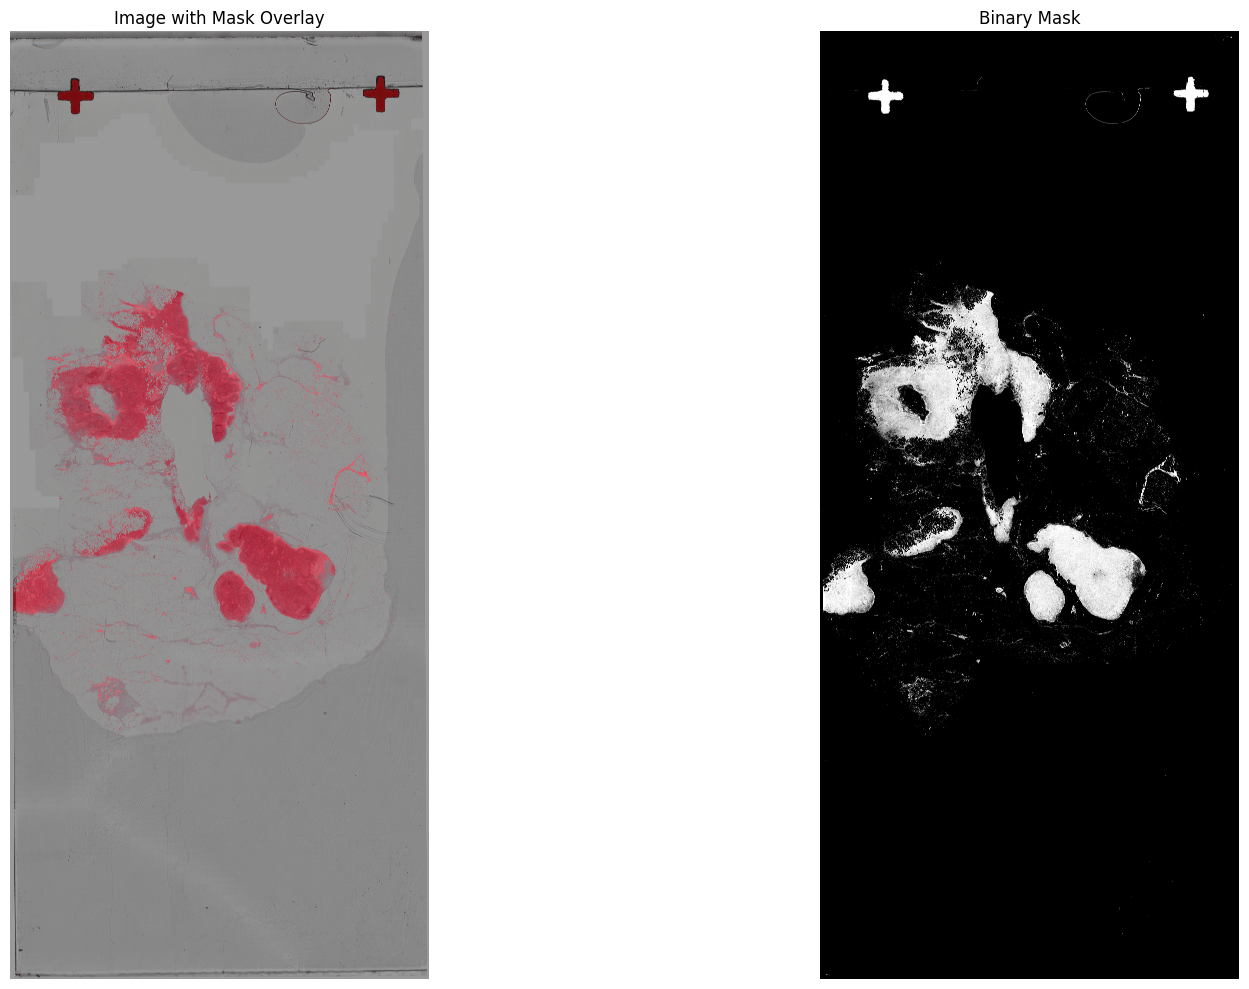

In [4]:
pp.visualize_mask_on_slide_side_by_side(slide, f_mask, level=3)

In [5]:
polygons = pp.annotations_to_coordinates(ann_path)
p_samples, p_sample_origins = pp.sample_positive_patches(slide_path, polygons, 256, 10)

In [6]:
gt_mask = pp.coordinates_to_mask(polygons, slide.dimensions)
p_sample_labels = pp.assign_patch_labels(256, p_sample_origins, gt_mask)

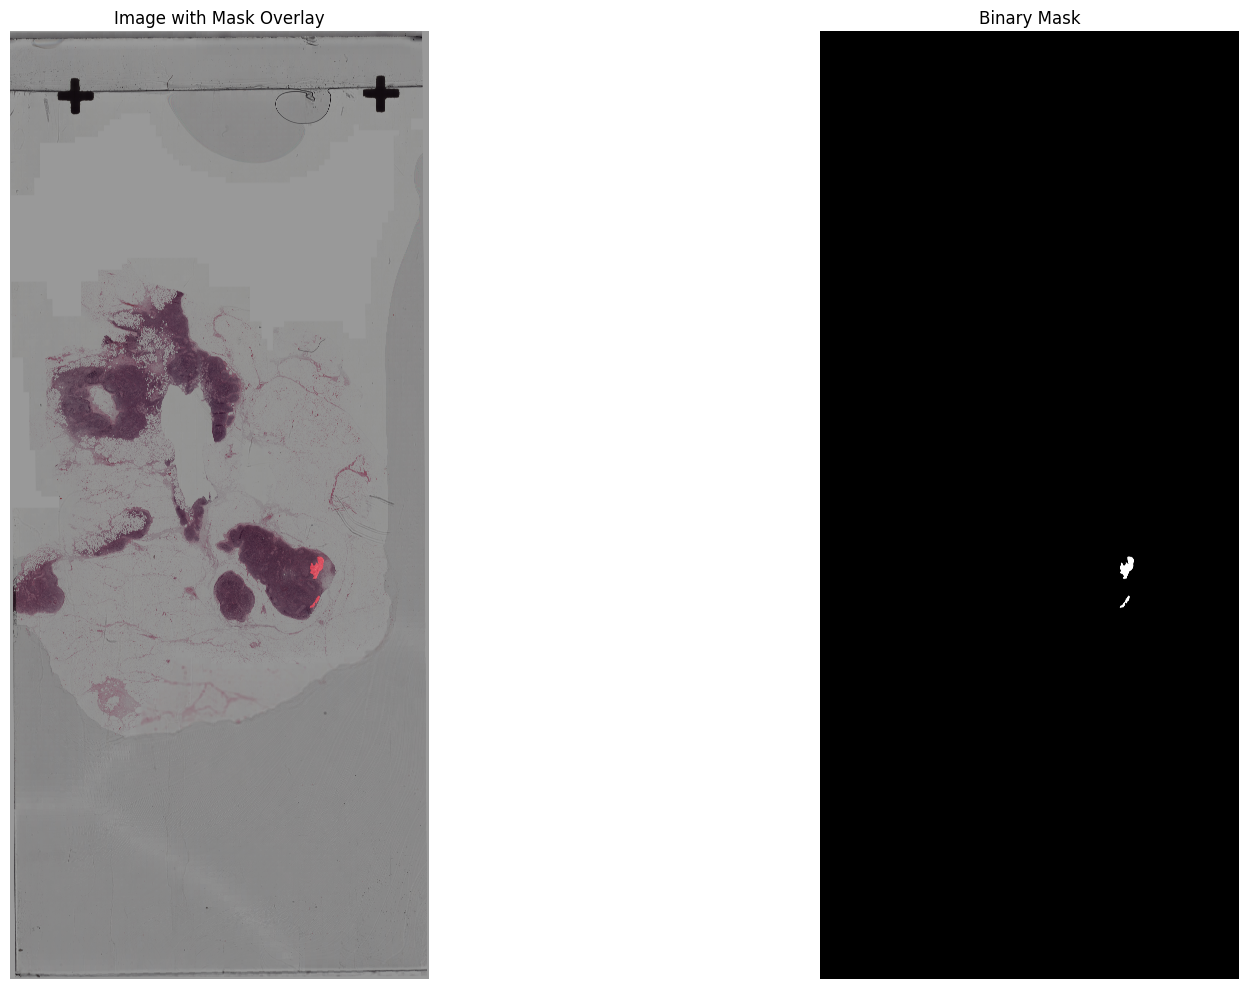

In [18]:
pp.visualize_mask_on_slide_side_by_side(slide, gt_mask, level=3)

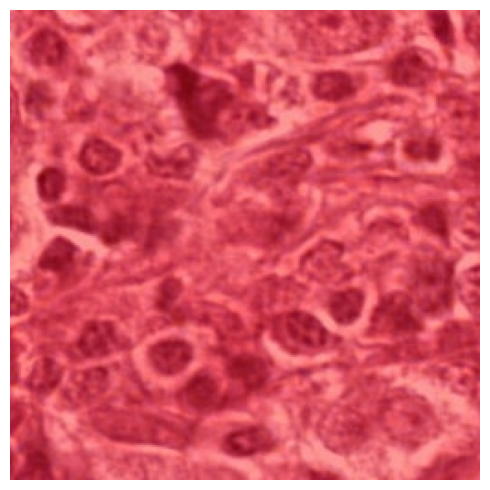

In [7]:
pp.visualise_patch_and_label(p_samples[0], p_sample_labels[0])


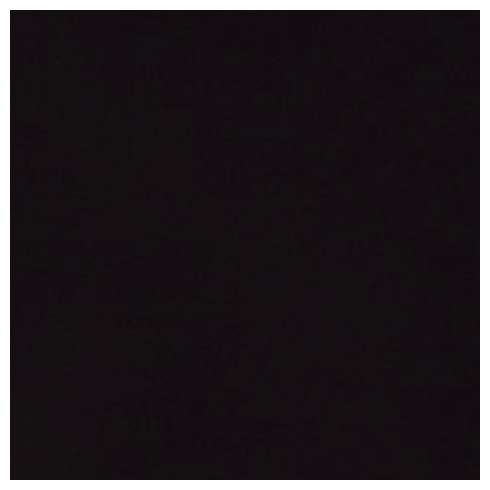

In [8]:
n_samples, n_sample_origins = pp.sample_negative_patches(slide_path, f_mask, polygons, 256, 10)
n_sample_labels = pp.assign_patch_labels(256, n_sample_origins, gt_mask)
pp.visualise_patch_and_label(n_samples[0], n_sample_labels[0])

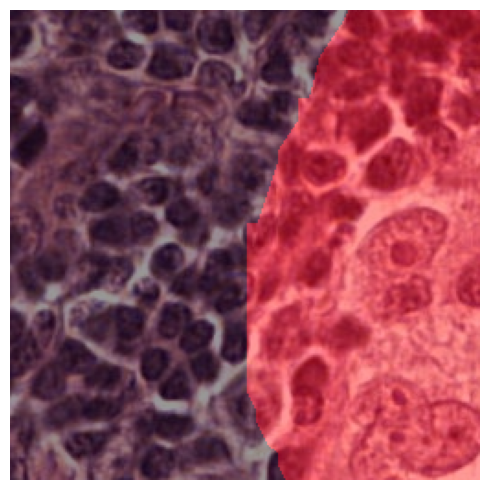

In [9]:
bc_samples, bc_sample_origins = pp.boundary_centered_sample_patches(slide_path, polygons, 256, 10)
bc_sample_labels = pp.assign_patch_labels(256, bc_sample_origins, gt_mask)
pp.visualise_patch_and_label(bc_samples[0], bc_sample_labels[0])

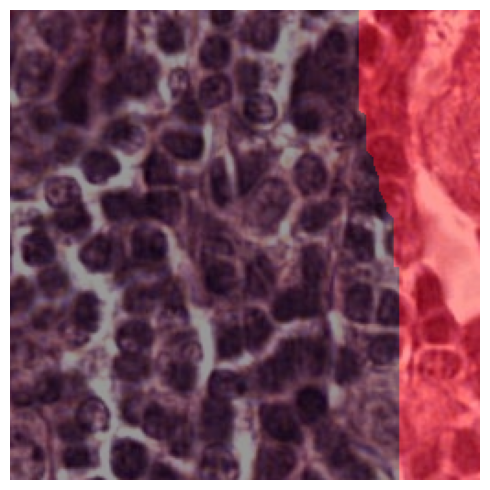

In [10]:
b_samples, b_sample_origins = pp.sample_boundary_patches(slide_path, polygons, 256, 10)
b_sample_labels = pp.assign_patch_labels(256, b_sample_origins, gt_mask)
pp.visualise_patch_and_label(b_samples[0], b_sample_labels[0])

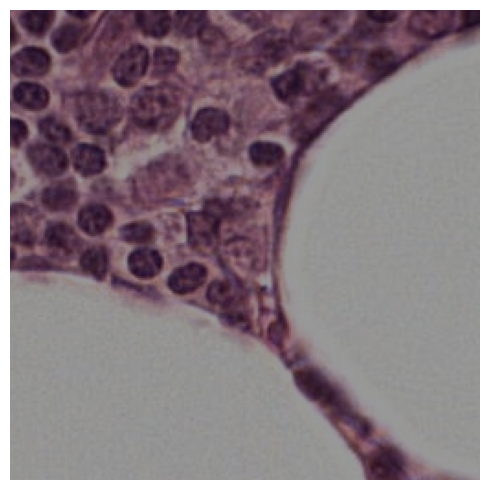

In [12]:
pp.visualise_patch_and_label(n_samples[1], n_sample_labels[1])

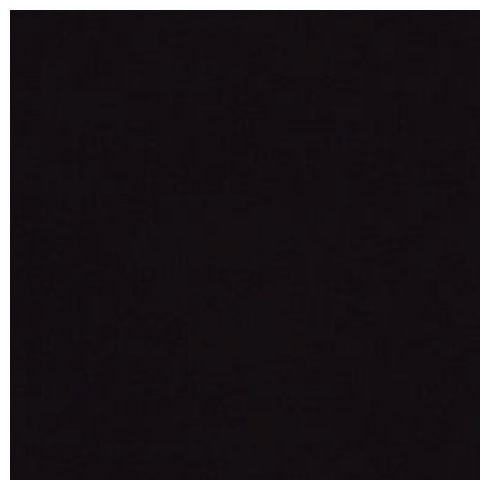

In [13]:
pp.visualise_patch_and_label(n_samples[2], n_sample_labels[2])

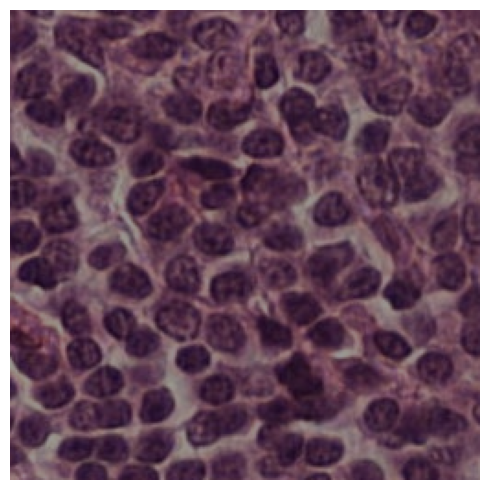

In [14]:
pp.visualise_patch_and_label(n_samples[3], n_sample_labels[3])

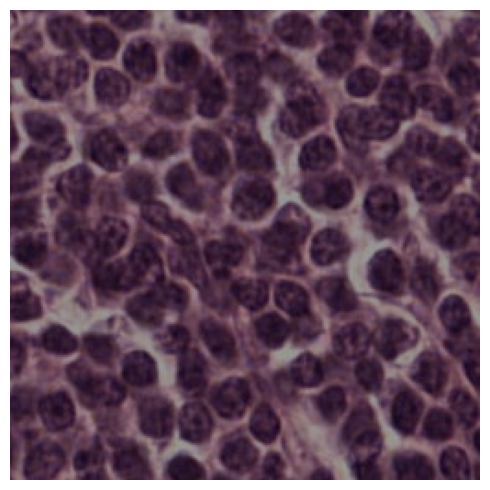

In [15]:
pp.visualise_patch_and_label(n_samples[4], n_sample_labels[4])

In [16]:
n_sample_origins[0]

(14546, 83260)

In [17]:
n_sample_origins[2]

(16036, 15535)